<a href="https://colab.research.google.com/github/LNSHRIVAS/Multi-Classifier-Loan-Prediction-From-Scratch/blob/main/Analysis_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project-1 MSML 603 UID 121334466: Developing Four Core Binary Classifiers from Scratch for Loan Approval Prediction and Assessing Dimensionality Reduction with PCA

**Project Summary**  
This project focuses on evaluating the performance of four binary classifiers on real-world loan approval data and analyzing how Principal Component Analysis (PCA) affects their accuracy. The classifiers include:

- **Decision Tree**  
- **k-Nearest Neighbors (kNN)**  
- **Linear Discriminant Analysis (LDA)**  
- **Support Vector Machine (SVM)**  

Each classifier is applied to a dataset of 27 features, with a binary label indicating loan approval (0 for approved, 1 for denied). We examine the performance of these models by measuring Type 1 (false positive) and Type 2 (false negative) error rates. All classifiers are implemented from scratch to enhance understanding and control over the algorithms.

**Objectives**  
**Binary Classification Performance**  
- Evaluate each classifier's effectiveness using the original 27 features.  
- Measure Type 1 and Type 2 error rates on the test data.  

**Dimensionality Reduction with PCA**  
- Assess the impact of feature reduction on kNN and SVM classifiers.  
- Experiment with different numbers of principal components (K = 5, 10, 15).  
- Compare performance metrics between classifiers trained on original vs. PCA-reduced features.  

**Data Overview**  
- **Training Data:** 900 samples (450 approved, 450 denied)  
- **Testing Data:** 400 samples (200 approved, 200 denied)  
- **Features:** 27 attributes (e.g., Age, Annual Income)  

**Project Breakdown**  
**Classifiers with Original Features**  
- **LDA:** Use projections onto a direction vector (w) for classification.  
- **Decision Tree:** Build using criteria like Gini impurity or information gain.  
- **kNN:** Evaluate with (k = 1, 3, 5, and 10).  
- **SVM:** Apply soft-margin SVM to manage non-separable data.  

**Classifiers with PCA-Reduced Features**  
- Reduce the feature set using PCA and apply kNN and SVM with (K = 5, 10, and 15) components.  
- Compare the error rates to those from classifiers trained on original features.  

**Evaluation Metrics**  
- **Type 1 Error Rate:** Percentage of approved loans misclassified as denied.  
- **Type 2 Error Rate:** Percentage of denied loans misclassified as approved.  

**Analysis Focus**  
- How error rates differ among classifiers.  
- PCA's effect on classifier performance and optimal component selection.  

This analysis helps demonstrate the trade-offs and benefits of dimensionality reduction for binary classification, specifically for loan approval prediction.


# Project Structure and Implementation

## Overview
This project is structured to facilitate the implementation and evaluation of four binary classifiers for loan approval prediction. The main computational work is encapsulated within a Jupyter Notebook, while the classifier implementations and supporting utilities are organized in separate Python files for modularity and ease of maintenance.

## Project Files

### Main Notebook
- **`Analysis_file.ipynb`**: This is the primary Jupyter Notebook where the project is executed. It imports various classifier modules from the source files and orchestrates the workflow for data loading, preprocessing, classifier training, and evaluation.

### Source Files
All source files are organized in the `src` directory, containing the implementations of different classifiers and utility functions:

1. **`BaseClassifier.py`**: This file defines the base class for all classifiers, providing common functionalities that can be inherited by specific classifiers.

2. **`DataLoader.py`**: Contains methods to load datasets for training and testing, ensuring that data is correctly structured for processing.

3. **`DataPreprocessing.py`**: Implements preprocessing techniques such as normalization and encoding to prepare the raw data for classifier input.

4. **`DecisionTreeClassifier.py`**: Implements the Decision Tree classifier, including methods for training and making predictions.

5. **`ErrorRateCalculator.py`**: Provides functionality to calculate Type 1 and Type 2 error rates, helping assess classifier performance.

6. **`KNeighbourClassifier.py`**: Implements the k-Nearest Neighbors classifier, including methods for fitting the model and making predictions based on distances to training samples.

7. **`LinearDiscriminantAnalysisClassifier.py`**: Contains the implementation of the Linear Discriminant Analysis classifier, with methods for training and prediction based on linear projections.

8. **`PrincipalComponentAnalysis.py`**: Implements PCA for dimensionality reduction, providing methods to transform the feature space before classification.

9. **`SupportVectorMachineClassifier.py`**: Implements the Support Vector Machine classifier, including methods for handling non-separable data and making predictions.

10. **`TestDataLoader.py`**: An optional testing class that uses unit tests to verify the integrity of the data before running the main classifiers. This ensures that any potential issues are identified early in the process.

11. **`common.py`**: Contains all necessary imports and shared utilities required to run the classifiers, promoting code reusability and simplifying dependencies.

## Modular Design
The modular design of this project allows for:
- **Ease of Testing**: Each classifier can be tested independently.
- **Code Reusability**: Common functionalities and imports are centralized, reducing redundancy.
- **Clear Organization**: Logical grouping of related functionalities makes it easier to navigate and update the project.

This structured approach ensures that the project remains scalable and maintainable while allowing for thorough experimentation with different classifiers and preprocessing techniques.


 In this project, I used the logging library instead of the print function to provide structured and configurable output. Logging allows for different severity levels and can be easily redirected to files or other outputs. This approach enhances debugging and monitoring while maintaining cleaner code.

In [1]:
import sys
sys.path.append('/Submission/src')  #Please provide the path to the source (src) folder here.

In [2]:
from common import * # This class contains all the necessary imports required to run this notebook.

INFO:root:info


info


In [3]:
# Importing all the various Classifier classes.

from DataLoader import DataLoader
from DataPreprocessing import DataPreprocessing
from TestDataLoader import TestDataLoader
from LinearDiscriminantAnalysisClassifier import LinearDiscriminantAnalysisClassifier
from DecisionTreeClassifier import DecisionTreeClassifier
from KNeighbourClassifier import KNeighbourClassifier
from SupportVectorMachineClassifier import SupportVectorMachineClassifier
from ErrorRateCalculator import ErrorRateCalculator
from PrincipleComponentAnalysis import PrincipleComponentAnalysis

In [4]:
training_data = '/Submission/data/TrainingData.csv' #Pass the path to training data
testing_data = '/Submission/data/TestingData.csv'   #Pass the path to testing data

In [5]:
data_loader = DataLoader(training_data, testing_data, 'LoanApproved')  #Loading the data
data_loader.verify_data_path() # Verifying the data

INFO:root:File is available: /content/drive/MyDrive/LoanData/TrainingData.csv


File is available: /content/drive/MyDrive/LoanData/TrainingData.csv


INFO:root:File is available: /content/drive/MyDrive/LoanData/TestingData.csv


File is available: /content/drive/MyDrive/LoanData/TestingData.csv


In [6]:
#Loading the data and applying processing on it.

train_data, train_labels, feature_names = data_loader.load_training_data()
test_data, test_labels = data_loader.load_testing_data()

train_processed_data = DataPreprocessing(train_data)
train_normalized_data, train_standardized_data = train_processed_data.transform_data()

test_processed_data = DataPreprocessing(test_data)
test_normalized_data, test_standardized_data = test_processed_data.transform_data()

INFO:root:Loading training data...


Loading training data...


INFO:root:Training data loaded successfully.


Training data loaded successfully.


INFO:root:Loading testing data...


Loading testing data...


INFO:root:Testing data loaded successfully.


Testing data loaded successfully.


INFO:root:Standardized column: {column} (mean: {mean}, std: {std})


Standardized column: {column} (mean: {mean}, std: {std})


INFO:root:Normalized column: {column} (min: {min_value}, max: {max_value})


Normalized column: {column} (min: {min_value}, max: {max_value})


INFO:root:Standardized column: {column} (mean: {mean}, std: {std})


Standardized column: {column} (mean: {mean}, std: {std})


INFO:root:Normalized column: {column} (min: {min_value}, max: {max_value})


Normalized column: {column} (min: {min_value}, max: {max_value})


In [7]:
error = ErrorRateCalculator() # This class I have created to calculate the error type 1 and type 2

# Linear Descriminanat Analysis

In [8]:
#Initializing the LDA and training

lda_classifier = LinearDiscriminantAnalysisClassifier()
lda_classifier.train(train_normalized_data, train_labels)

INFO:root:Training LDA is successfully completed


Training LDA is successfully completed


INFO:root:weight: [ 0.20548358  0.1739984  -0.35003794 -0.09978069 -0.19891839  0.14948629
  0.06249159 -0.14193172 -0.00747803  0.00277889 -0.01637039  0.05331457
 -0.26763992 -0.08557263  0.07468275  0.23179282 -0.03311524 -0.10299414
  0.0129577  -0.04917666  1.08876505  0.04608559  0.06010527  0.47057916
 -0.90588139 -0.04664532 -0.27219406]


weight: [ 0.20548358  0.1739984  -0.35003794 -0.09978069 -0.19891839  0.14948629
  0.06249159 -0.14193172 -0.00747803  0.00277889 -0.01637039  0.05331457
 -0.26763992 -0.08557263  0.07468275  0.23179282 -0.03311524 -0.10299414
  0.0129577  -0.04917666  1.08876505  0.04608559  0.06010527  0.47057916
 -0.90588139 -0.04664532 -0.27219406]


INFO:root:bias: 1.339733760941119e-16


bias: 1.339733760941119e-16


INFO:root:threshold: 0.0


threshold: 0.0


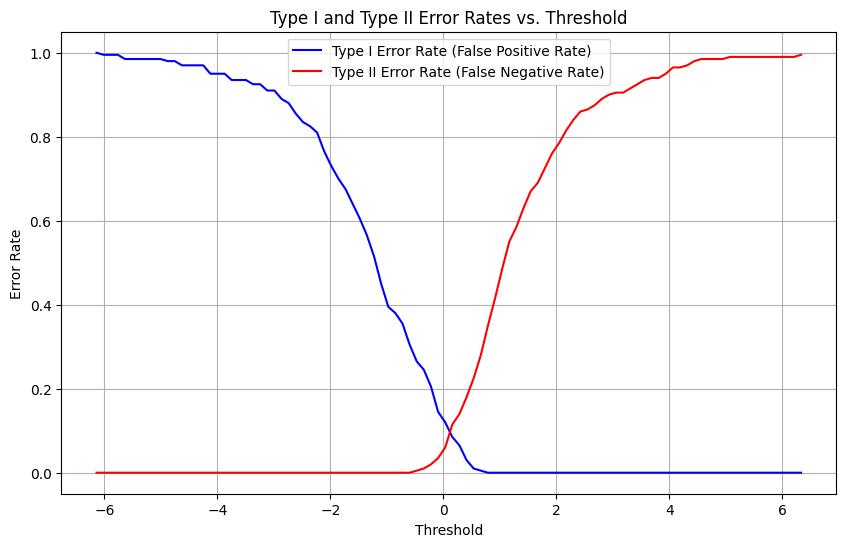

In [9]:
#Plotting the values of type 1 and type 2 error

lda_classifier.plot_error_rate(test_normalized_data, test_labels)

In [10]:
#find the best threshold value between -1 and 1 as the region is visible from the graph

thresholds = np.linspace(-1,1, 100)
best_threshold, f1_score = lda_classifier.find_best_threshold(test_standardized_data, test_labels, thresholds)
logging.info(f'Best threshold: {best_threshold}')
logging.info(f'F1 Score: {f1_score}')

INFO:root:Best threshold: -0.010101010101010055


Best threshold: -0.010101010101010055


INFO:root:F1 Score: 0.8941176470588236


F1 Score: 0.8941176470588236


In [11]:
predictions = lda_classifier.predict(test_normalized_data, best_threshold)

In [12]:
logging.info(f'Accuracy: {np.mean(predictions == test_labels)}')

INFO:root:Accuracy: 0.92


Accuracy: 0.92


# Decision Tree Classifier

In [13]:
DTC = DecisionTreeClassifier(max_depth = 4, feature_names = feature_names)
DTC.fit(train_normalized_data, train_labels)

In [14]:
DTC.print_decision_tree()

Is TotalDebtToIncomeRatio <= -0.31588314894517683
  Is InterestRate <= 0.7195667721725263
    Is MonthlyIncome <= -0.44180574647731546
      Is Loan Amount <= -0.845431634315279
        Predict: 1
        Predict: 0
      Is Bankruptcy History <= 4.356476659972953
        Predict: 1
        Predict: 0
    Is TotalDebtToIncomeRatio <= -0.6179522479140279
      Is InterestRate <= 2.2486959863287312
        Predict: 1
        Predict: 0
      Is NetWorth <= 0.04791036159954293
        Predict: 0
        Predict: 0
  Is NetWorth <= 0.6758875085496383
    Is InterestRate <= -1.152645000347366
      Is TotalDebtToIncomeRatio <= 0.09670784948111506
        Predict: 1
        Predict: 0
      Is TotalDebtToIncomeRatio <= 0.07935045836683757
        Predict: 0
        Predict: 0
    Is Annual Income <= -0.7952422954151314
      Is Debt to Income Ratio <= -1.1778144467860654
        Predict: 1
        Predict: 0
      Is TotalDebtToIncomeRatio <= -0.14508483091720953
        Predict: 1
        P

In [15]:
DTC_accuracy, DTC_predictions = DTC.get_accuracy_and_predictions(test_normalized_data, test_labels)

In [16]:
logging.info(f'Accuracy: {DTC_accuracy}')

INFO:root:Accuracy: 0.865


Accuracy: 0.865


In [17]:
type_1_error_rate, type_2_error_rate = error.errore_rate_calculation(test_labels, DTC_predictions)

In [18]:
logging.info(f'Type 1 Error Rate: {type_1_error_rate}')
logging.info(f'Type 2 Error Rate: {type_2_error_rate}')

INFO:root:Type 1 Error Rate: 0.13


Type 1 Error Rate: 0.13


INFO:root:Type 2 Error Rate: 0.14


Type 2 Error Rate: 0.14


# K Nearest Neighbours

In [19]:
K  = [1,3,5,10]

In [20]:
for K in K:
  KNN = KNeighbourClassifier(k = K)
  KNN.fit(train_normalized_data, train_labels)

  KNN_accuracy, KNN_predictions = KNN.get_accuracy_and_predictions(test_normalized_data, test_labels)

  KNN_type_1_error_rate, KNN_type_2_error_rate = error.errore_rate_calculation(test_labels, KNN_predictions)

  logger.info(f'KNN Classifier Results for K = {K}')
  logger.info(f'----------------------------------------')
  logger.info(f'Accuracy            : {KNN_accuracy:.4f}')
  logger.info(f'Type 1 Error Rate   : {KNN_type_1_error_rate:.4f}')
  logger.info(f'Type 2 Error Rate   : {KNN_type_2_error_rate:.4f}')
  logger.info(f'----------------------------------------')
  logger.info('')

INFO:root:KNN Classifier Results for K = 1


KNN Classifier Results for K = 1


INFO:root:----------------------------------------


----------------------------------------


INFO:root:Accuracy            : 0.7725


Accuracy            : 0.7725


INFO:root:Type 1 Error Rate   : 0.2500


Type 1 Error Rate   : 0.2500


INFO:root:Type 2 Error Rate   : 0.2050


Type 2 Error Rate   : 0.2050


INFO:root:----------------------------------------


----------------------------------------


INFO:root:


INFO:root:KNN Classifier Results for K = 3


KNN Classifier Results for K = 3


INFO:root:----------------------------------------


----------------------------------------


INFO:root:Accuracy            : 0.8200


Accuracy            : 0.8200


INFO:root:Type 1 Error Rate   : 0.2450


Type 1 Error Rate   : 0.2450


INFO:root:Type 2 Error Rate   : 0.1150


Type 2 Error Rate   : 0.1150


INFO:root:----------------------------------------


----------------------------------------


INFO:root:


INFO:root:KNN Classifier Results for K = 5


KNN Classifier Results for K = 5


INFO:root:----------------------------------------


----------------------------------------


INFO:root:Accuracy            : 0.8475


Accuracy            : 0.8475


INFO:root:Type 1 Error Rate   : 0.2200


Type 1 Error Rate   : 0.2200


INFO:root:Type 2 Error Rate   : 0.0850


Type 2 Error Rate   : 0.0850


INFO:root:----------------------------------------


----------------------------------------


INFO:root:


INFO:root:KNN Classifier Results for K = 10


KNN Classifier Results for K = 10


INFO:root:----------------------------------------


----------------------------------------


INFO:root:Accuracy            : 0.8250


Accuracy            : 0.8250


INFO:root:Type 1 Error Rate   : 0.2050


Type 1 Error Rate   : 0.2050


INFO:root:Type 2 Error Rate   : 0.1450


Type 2 Error Rate   : 0.1450


INFO:root:----------------------------------------


----------------------------------------


INFO:root:


# Support Vector Machine

### Support Vector Machine (SVM) Objective Function
I have implimented support vector machine classifier and I am using this
objective function for selecting the hyperplane:

- Minimize:

$$
\frac{1}{2} ||w||^2 + C \sum \xi_i
$$

#### Where:
- $$(||w||^2)$$ is the squared norm of the weight vector.
- C is the regularization parameter.
- $$∑ \xi_i$$ are the slack variables allowing for misclassification.


In [21]:
SVM = SupportVectorMachineClassifier()
SVM.fit(train_normalized_data, train_labels)

In [22]:
SVM_accuracy, SVM_predictions = SVM.get_accuracy_and_predictions(test_normalized_data, test_labels)
logger.info(f'SVM_Accuracy: {SVM_accuracy}')

INFO:root:SVM_Accuracy: 0.9325


SVM_Accuracy: 0.9325


In [23]:
SVM_type_1_error_rate, SVM_type_2_error_rate = error.errore_rate_calculation(test_labels, SVM_predictions)

In [24]:
print(f'Type 1 error rate: {SVM_type_1_error_rate}')
print(f'Type 2 error rate: {SVM_type_2_error_rate}')

Type 1 error rate: 0.115
Type 2 error rate: 0.02


# Principle Component Analysis

we have been asked to train the K nearest neighbour and Support vector machine classifier for all these three componenets 5, 10, 15. We itreate 3 times and print all of them one by one.

In [25]:
components = [5, 10, 15]

In [26]:
for component in components:

  PCA = PrincipleComponentAnalysis(component)
  PCA.fit(train_data)
  PCA_train_data = PCA.transform(train_data)
  PCA_test_data = PCA.transform(test_data)

  PCA_KNN = KNeighbourClassifier(k = 5)
  PCA_KNN.fit(PCA_train_data, train_labels)

  PCA_KNN_accuracy, PCA_KNN_predictions = PCA_KNN.get_accuracy_and_predictions(PCA_test_data, test_labels)

  PCA_KNN_type_1_error_rate, PCA_KNN_type_2_error_rate = error.errore_rate_calculation(test_labels, PCA_KNN_predictions)

  logger.info(f'KNN Classifier Results for {component} Components')
  logger.info(f'----------------------------------------')
  logger.info(f'Accuracy            : {PCA_KNN_accuracy:.4f}')
  logger.info(f'Type 1 Error Rate   : {PCA_KNN_type_1_error_rate:.4f}')
  logger.info(f'Type 2 Error Rate   : {PCA_KNN_type_2_error_rate:.4f}')
  logger.info(f'----------------------------------------')
  logger.info('')

  PCA_SVM = SupportVectorMachineClassifier()
  PCA_SVM.fit(PCA_train_data, train_labels)

  PCA_SVM_accuracy, PCA_SVM_predictions = PCA_SVM.get_accuracy_and_predictions(PCA_test_data, test_labels)

  PCA_SVM_type_1_error_rate, PCA_SVM_type_2_error_rate = error.errore_rate_calculation(test_labels, PCA_SVM_predictions)

  logger.info(f'SVM Classifier Results for {component} Components')
  logger.info(f'----------------------------------------')
  logger.info(f'Accuracy            : {PCA_SVM_accuracy:.4f}')
  logger.info(f'Type 1 Error Rate   : {PCA_SVM_type_1_error_rate:.4f}')
  logger.info(f'Type 2 Error Rate   : {PCA_SVM_type_2_error_rate:.4f}')
  logger.info(f'----------------------------------------')
  logger.info('')
  logger.info('=================================================================================')

INFO:root:KNN Classifier Results for 5 Components


KNN Classifier Results for 5 Components


INFO:root:----------------------------------------


----------------------------------------


INFO:root:Accuracy            : 0.8600


Accuracy            : 0.8600


INFO:root:Type 1 Error Rate   : 0.1800


Type 1 Error Rate   : 0.1800


INFO:root:Type 2 Error Rate   : 0.1000


Type 2 Error Rate   : 0.1000


INFO:root:----------------------------------------


----------------------------------------


INFO:root:


INFO:root:SVM Classifier Results for 5 Components


SVM Classifier Results for 5 Components


INFO:root:----------------------------------------


----------------------------------------


INFO:root:Accuracy            : 0.8825


Accuracy            : 0.8825


INFO:root:Type 1 Error Rate   : 0.1800


Type 1 Error Rate   : 0.1800


INFO:root:Type 2 Error Rate   : 0.0550


Type 2 Error Rate   : 0.0550


INFO:root:----------------------------------------


----------------------------------------


INFO:root:


INFO:root:=================================================================================


INFO:root:KNN Classifier Results for 10 Components


KNN Classifier Results for 10 Components


INFO:root:----------------------------------------


----------------------------------------


INFO:root:Accuracy            : 0.8425


Accuracy            : 0.8425


INFO:root:Type 1 Error Rate   : 0.2000


Type 1 Error Rate   : 0.2000


INFO:root:Type 2 Error Rate   : 0.1150


Type 2 Error Rate   : 0.1150


INFO:root:----------------------------------------


----------------------------------------


INFO:root:


INFO:root:SVM Classifier Results for 10 Components


SVM Classifier Results for 10 Components


INFO:root:----------------------------------------


----------------------------------------


INFO:root:Accuracy            : 0.9025


Accuracy            : 0.9025


INFO:root:Type 1 Error Rate   : 0.1650


Type 1 Error Rate   : 0.1650


INFO:root:Type 2 Error Rate   : 0.0300


Type 2 Error Rate   : 0.0300


INFO:root:----------------------------------------


----------------------------------------


INFO:root:


INFO:root:=================================================================================


INFO:root:KNN Classifier Results for 15 Components


KNN Classifier Results for 15 Components


INFO:root:----------------------------------------


----------------------------------------


INFO:root:Accuracy            : 0.8100


Accuracy            : 0.8100


INFO:root:Type 1 Error Rate   : 0.2700


Type 1 Error Rate   : 0.2700


INFO:root:Type 2 Error Rate   : 0.1100


Type 2 Error Rate   : 0.1100


INFO:root:----------------------------------------


----------------------------------------


INFO:root:


INFO:root:SVM Classifier Results for 15 Components


SVM Classifier Results for 15 Components


INFO:root:----------------------------------------


----------------------------------------


INFO:root:Accuracy            : 0.9025


Accuracy            : 0.9025


INFO:root:Type 1 Error Rate   : 0.1700


Type 1 Error Rate   : 0.1700


INFO:root:Type 2 Error Rate   : 0.0250


Type 2 Error Rate   : 0.0250


INFO:root:----------------------------------------


----------------------------------------


INFO:root:


INFO:root:=================================================================================


In [52]:
!tar -cvf /content/Submission.tar -C /content Submission

Submission/
Submission/.ipynb_checkpoints/
Submission/README.txt
Submission/Analysis_file.ipynb
Submission/data/
Submission/data/TrainingData.csv
Submission/data/TestingData.csv
Submission/src/
Submission/src/DecisionTreeClassifier.py
Submission/src/BaseClassifier.py
Submission/src/PrincipleComponentAnalysis.py
Submission/src/DataLoader.py
Submission/src/LinearDiscriminantAnalysisClassifier.py
Submission/src/ErrorRateCalculator.py
Submission/src/common.py
Submission/src/DataPreprocessing.py
Submission/src/KNeighbourClassifier.py
Submission/src/SupportVectorMachineClassifier.py
Submission/src/TestDataLoader.py
